In [1]:
#local env variables
#first time? run on terminal : pip install -r requirements.txt
from dotenv import dotenv_values
config = dotenv_values(".env.local")

# Building references

### Config👾

In [2]:
#cspell:disable
from models.inventory import Project
### Import Data 💾
from source.vlp_ssvsa import data

### init project
project:Project = Project(**data['project'])

getting weather data...
api request URL https://power.larc.nasa.gov/api/temporal/hourly/point?Time=LST&parameters=T2M,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_SRF_ALB,SZA,WS10M&community=RE&latitude=-33.04401&longitude=-71.62143&start=20230101&end=20231231&format=JSON
getting currencies data...
set $1 Pesos chileno.. on USD$0.00 
set $1 UF............. on USD$38.21 
set $1 UTM............ on USD$67.04 
set $1 Euro........... on USD$1.03 
set $1 Pound.......... on USD$1.25 
set $1 Real........... on USD$0.16 


### Consumptions && bills 🔌

In [3]:
project.building.add_consumptions(**data['consumptions'])

# Integration 

### Machine Components 🎡

In [4]:
#cspell: disable
from IPython.display import clear_output

#clean previous load
clear_output(wait=True)
project.components = {}

# assembly projects components
project.add_generator(*data['components']['generator'])
#nominal power
pj_power = project.nominal_power
# Energy process
project.add_component(*data['components']['install'])
# BESS & Storage
project.add_storage(*data['components']['storage'])
# obras y accesorios
project.add_component(*data['components']['accesories'])
#Define bucket overloads
project.bucket.set_overloads(**data['components']['overloads'])

inside cost pv :  208547.06 Currency.CLP
inside cost pv :  208547.06 Currency.CLP


# Write Document 📒


c:\Users\crcam\Dev\pv-report-modeler\models\plotter.py:231: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = module.fillna(0).pivot_table(
c:\Users\crcam\Dev\pv-report-modeler\models\plotter.py:231: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot = module.fillna(0).pivot_table(
c:\Users\crcam\Dev\pv-report-modeler\models\plotter.py:315: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


plot_done
replaced plot: plot_consumption_forecast
replaced plot: plot_irradiance
replaced plot: plot_temperature
replaced plot: plot_components
replaced plot: plot_components_irr
replaced plot: plot_components_production
replaced plot: plot_production_performance
replaced plot: plot_performance_frequency
replaced plot: plot_flux
replaced plot: map_location
work <models.inventory.Project object at 0x000002CA071D8D70> finish at:  2025-01-08 13:51:34.077204


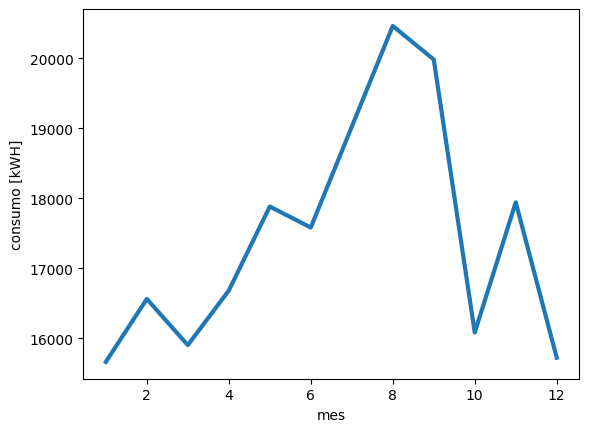

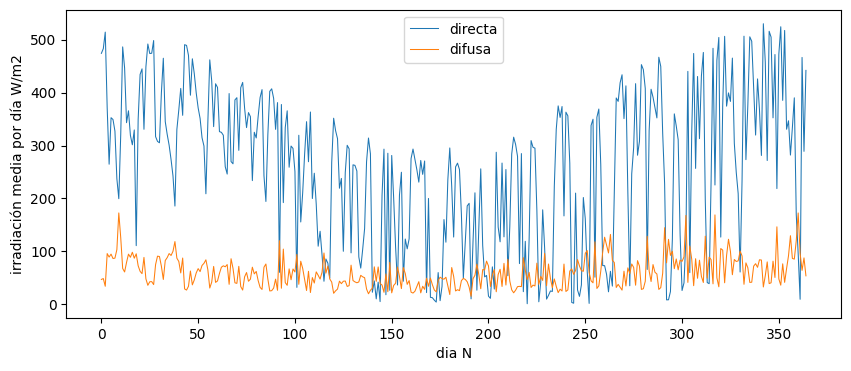

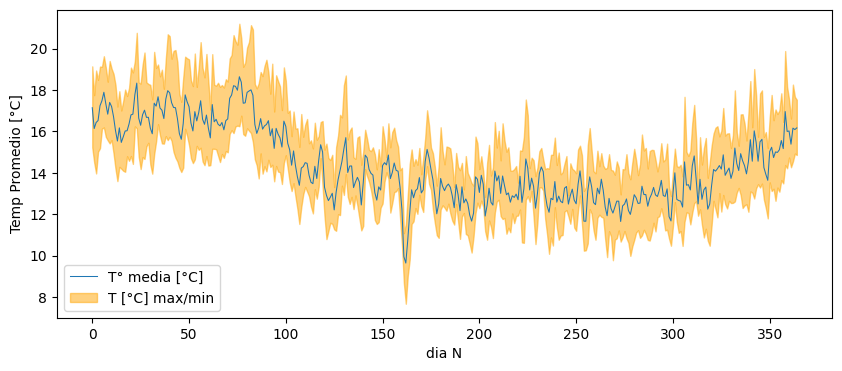

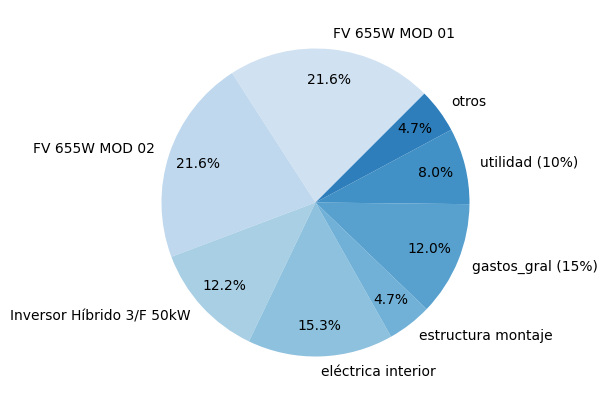

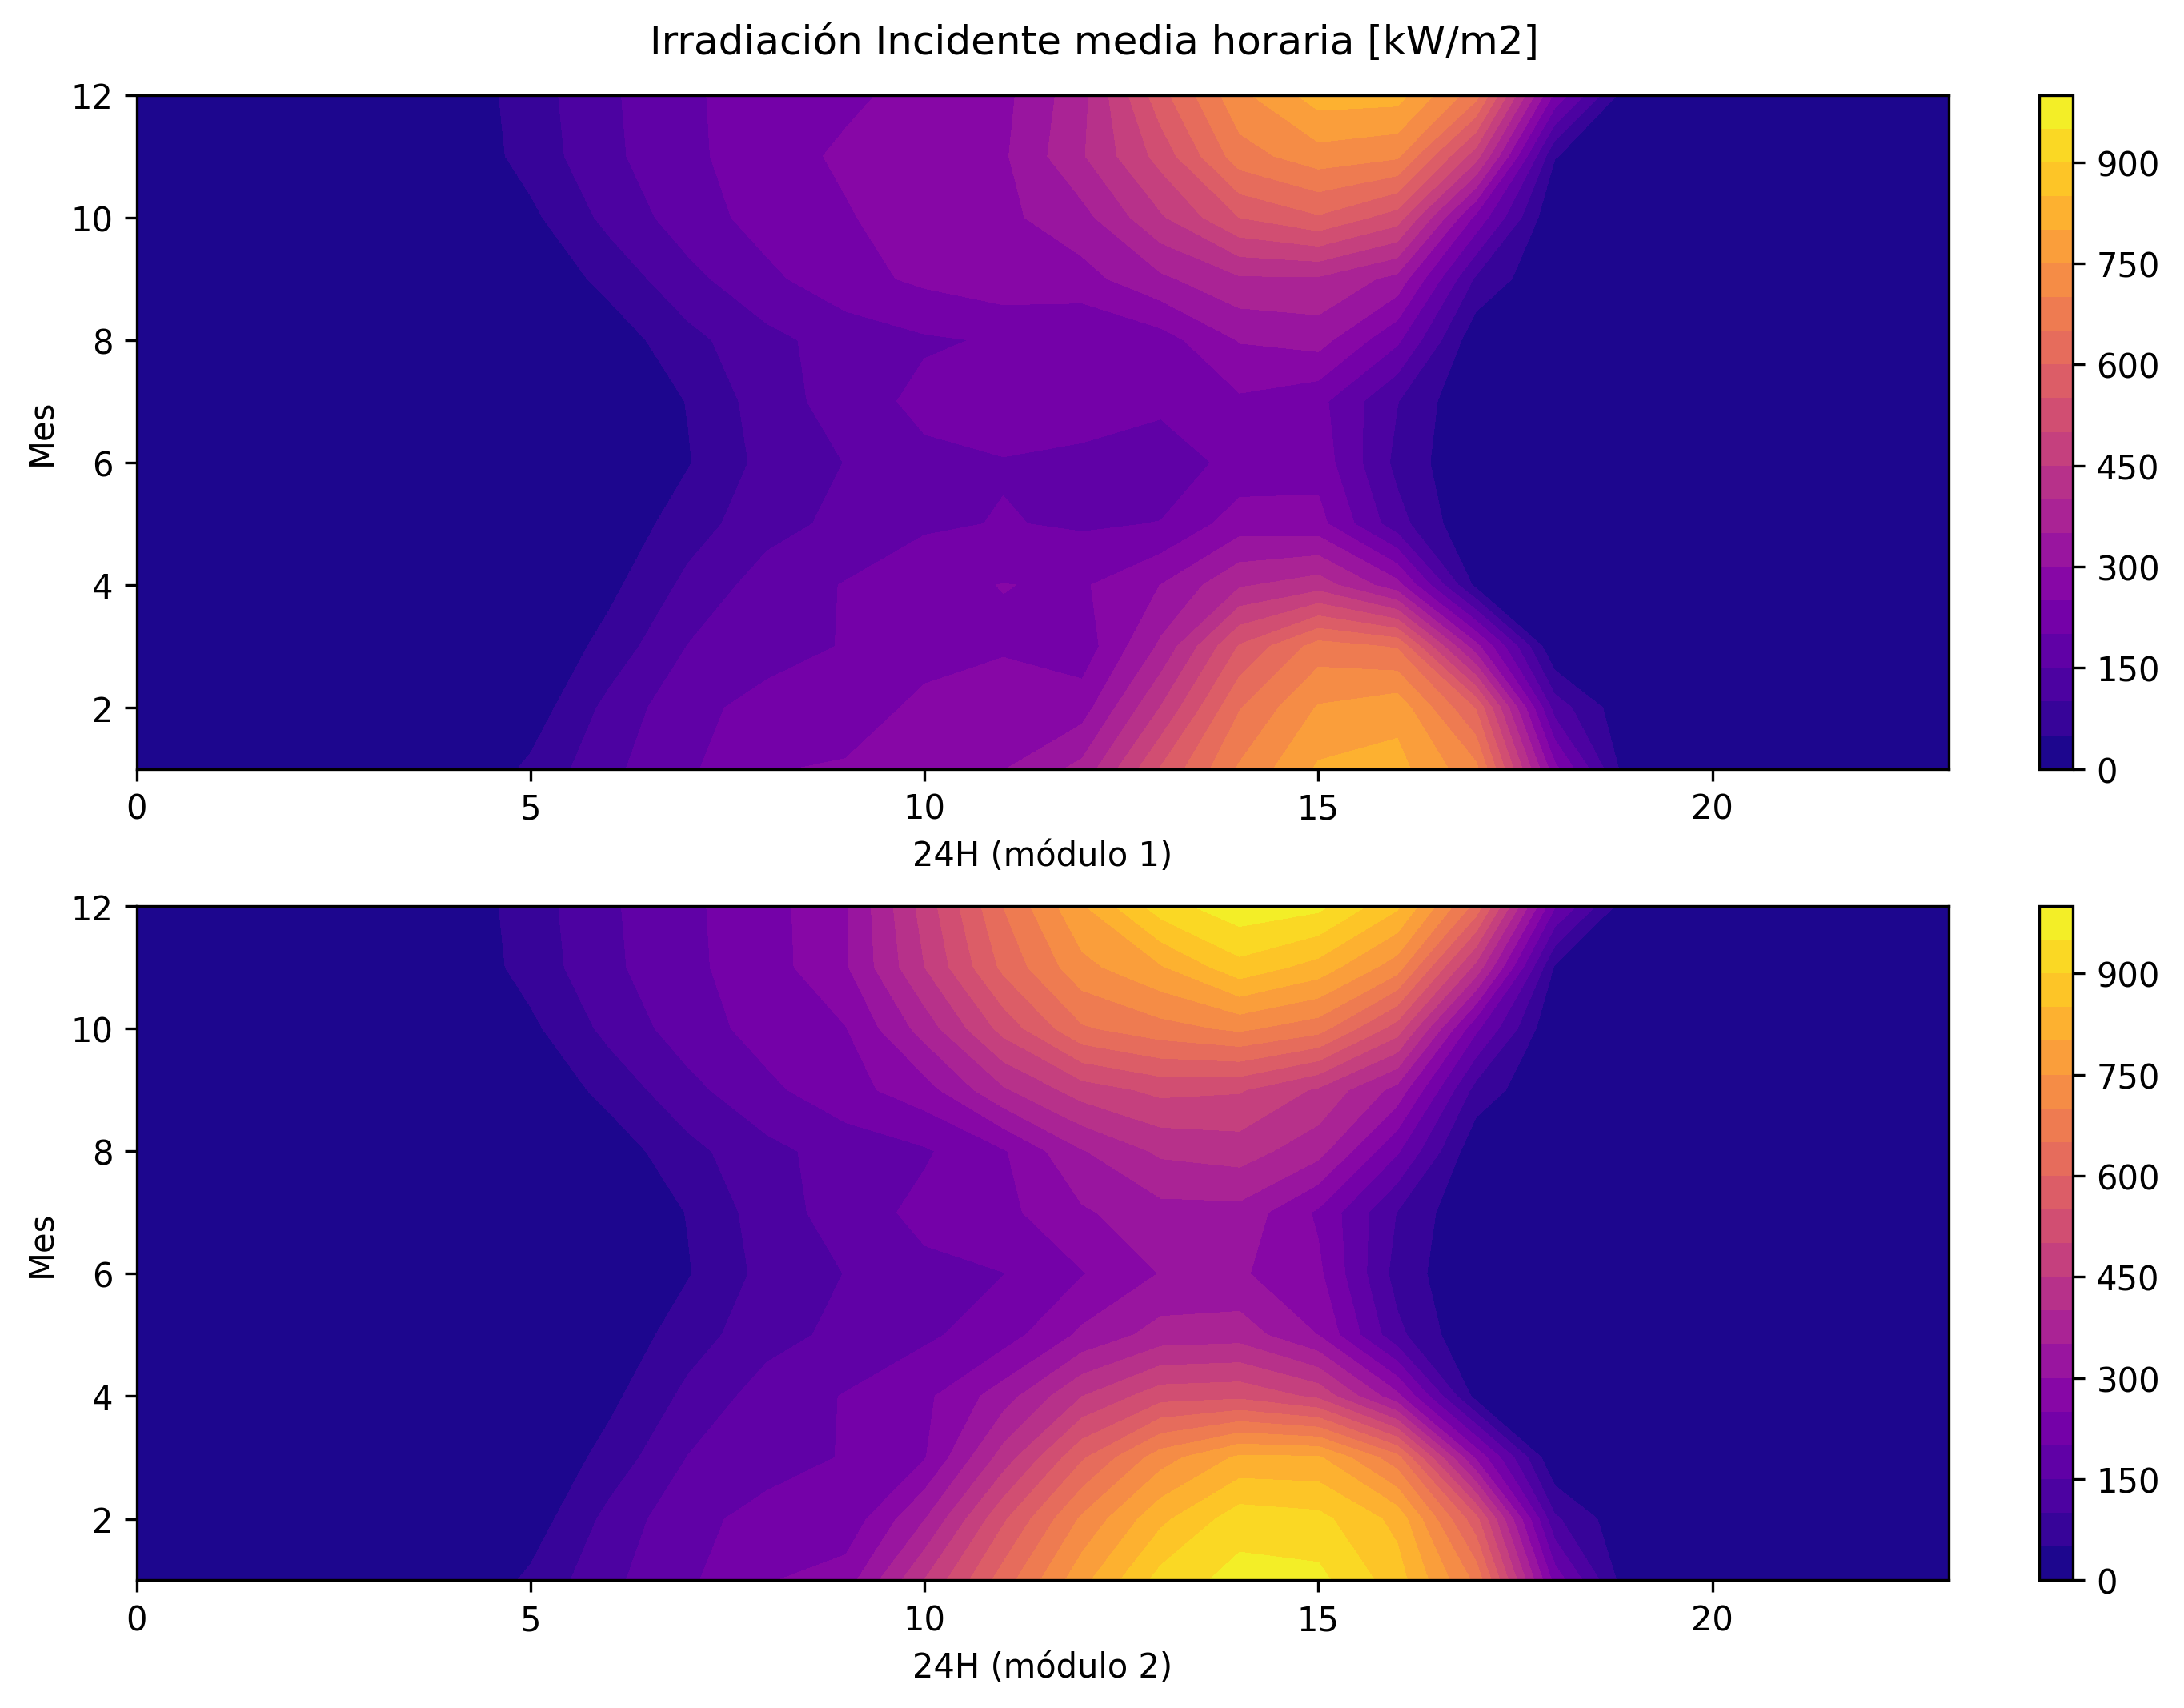

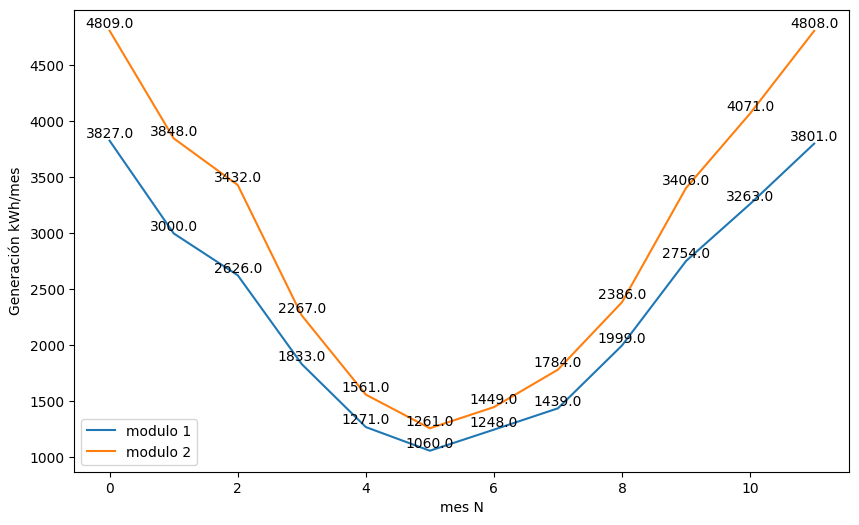

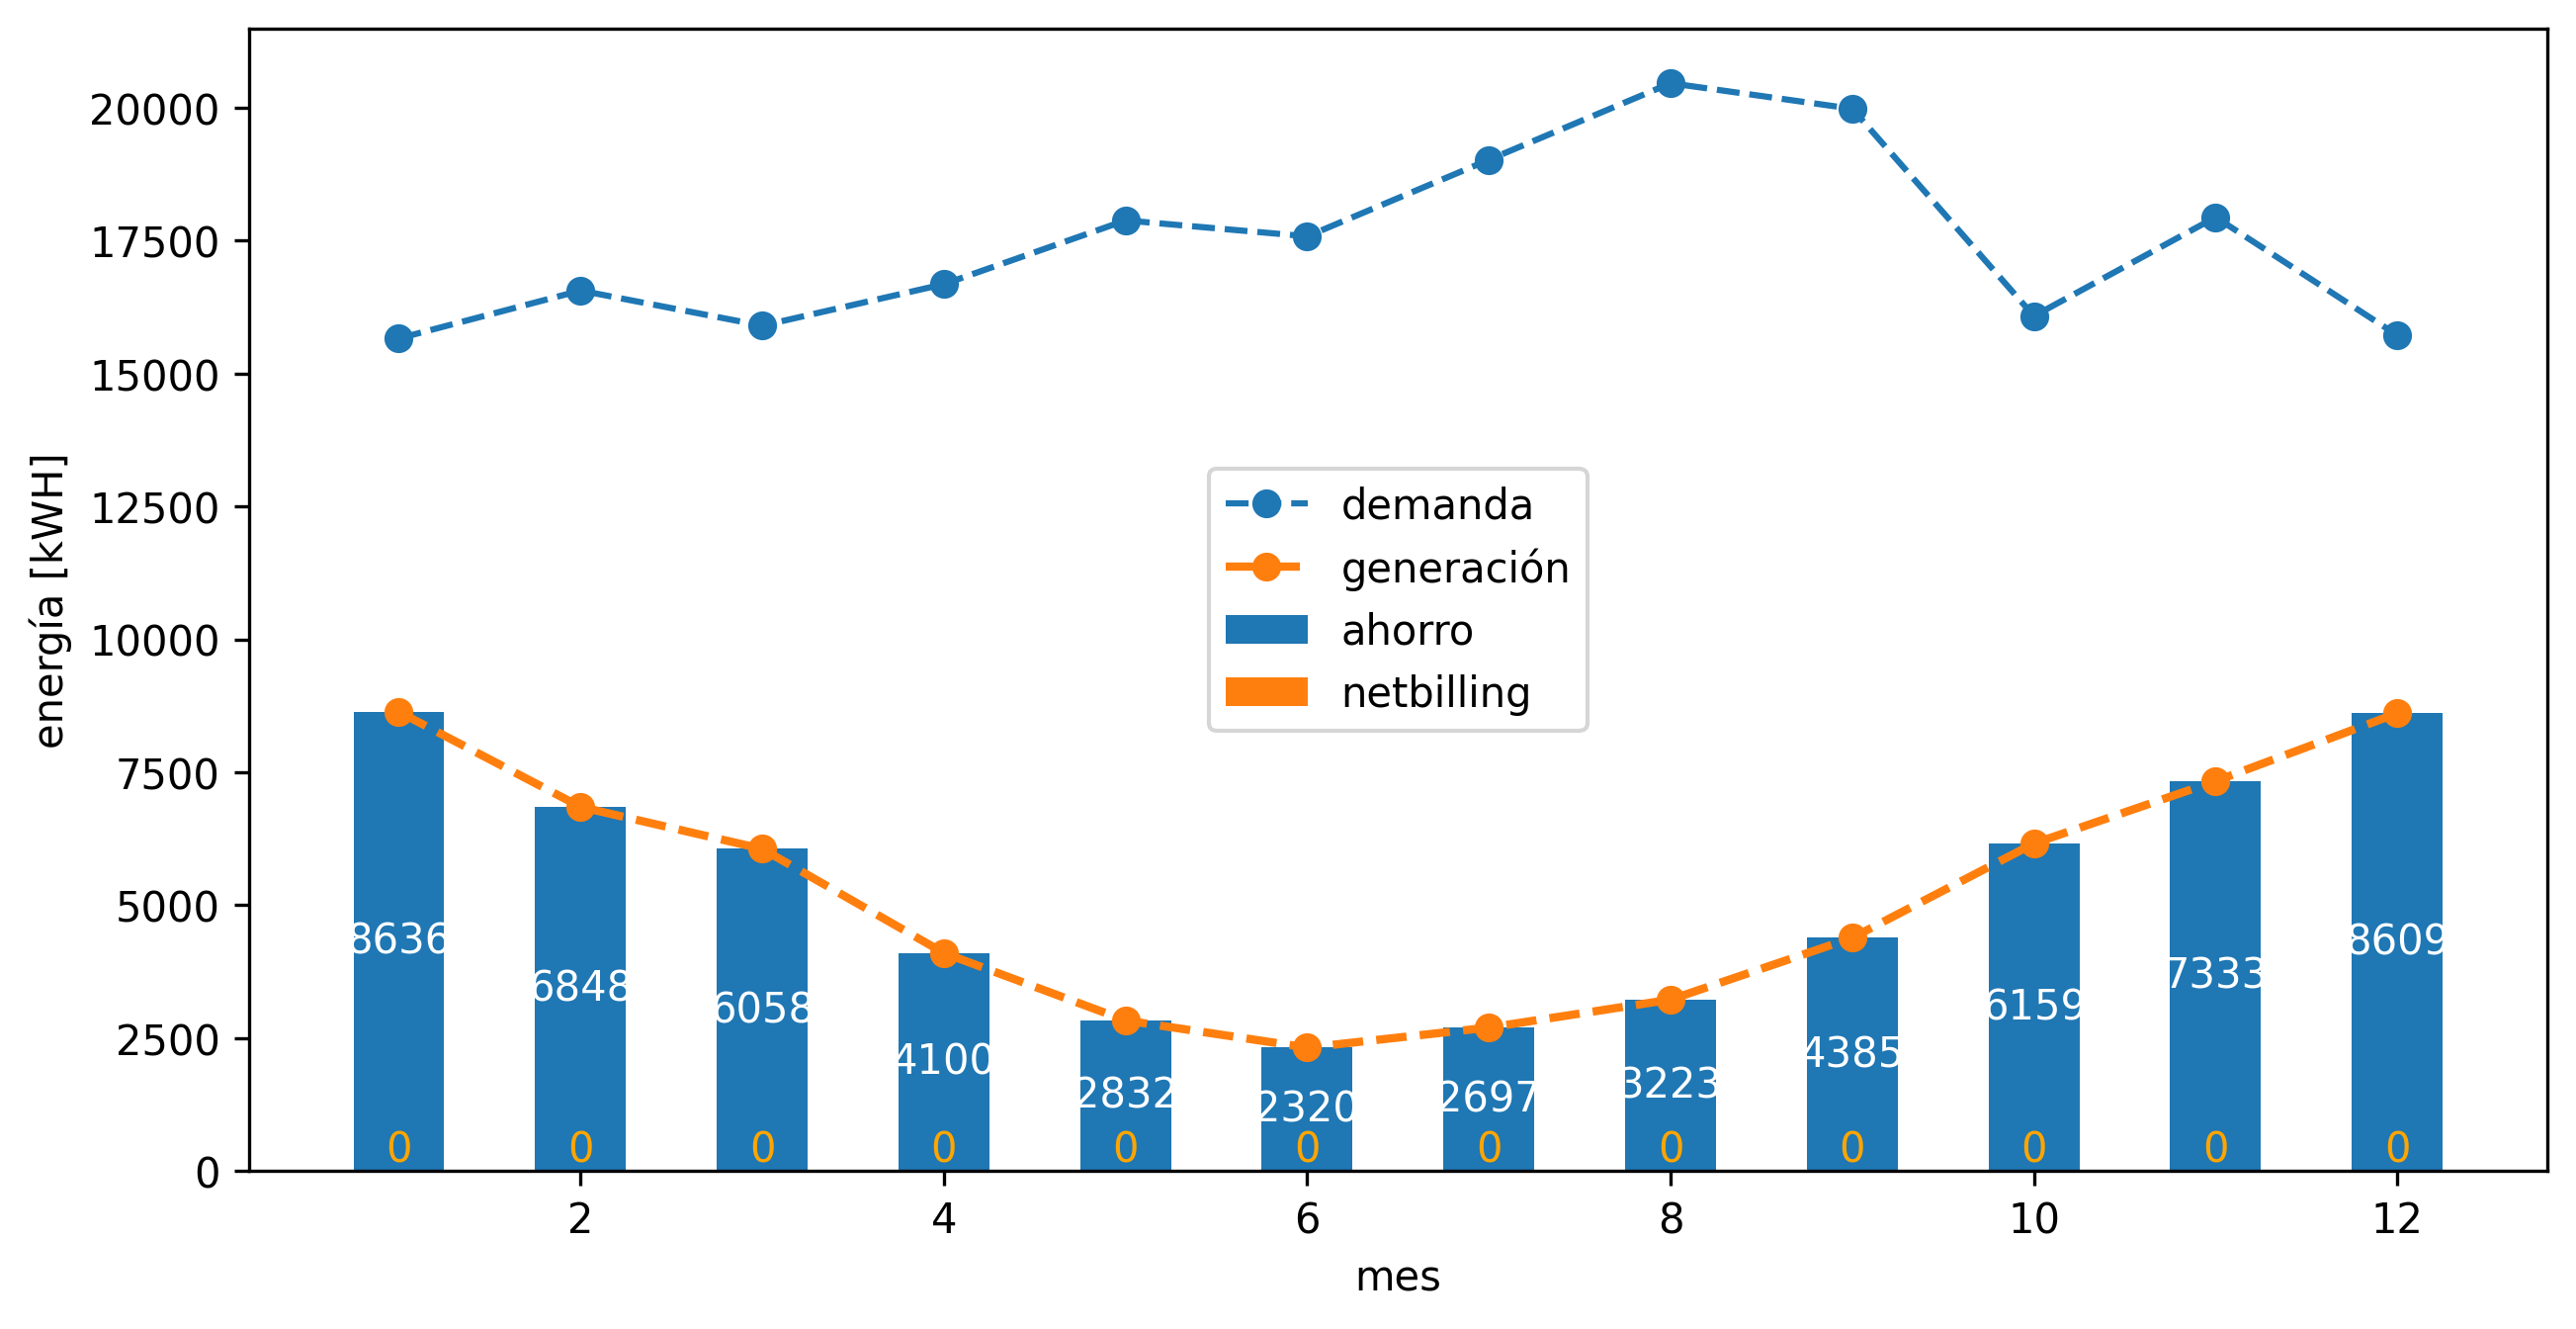

<Figure size 1920x1440 with 0 Axes>

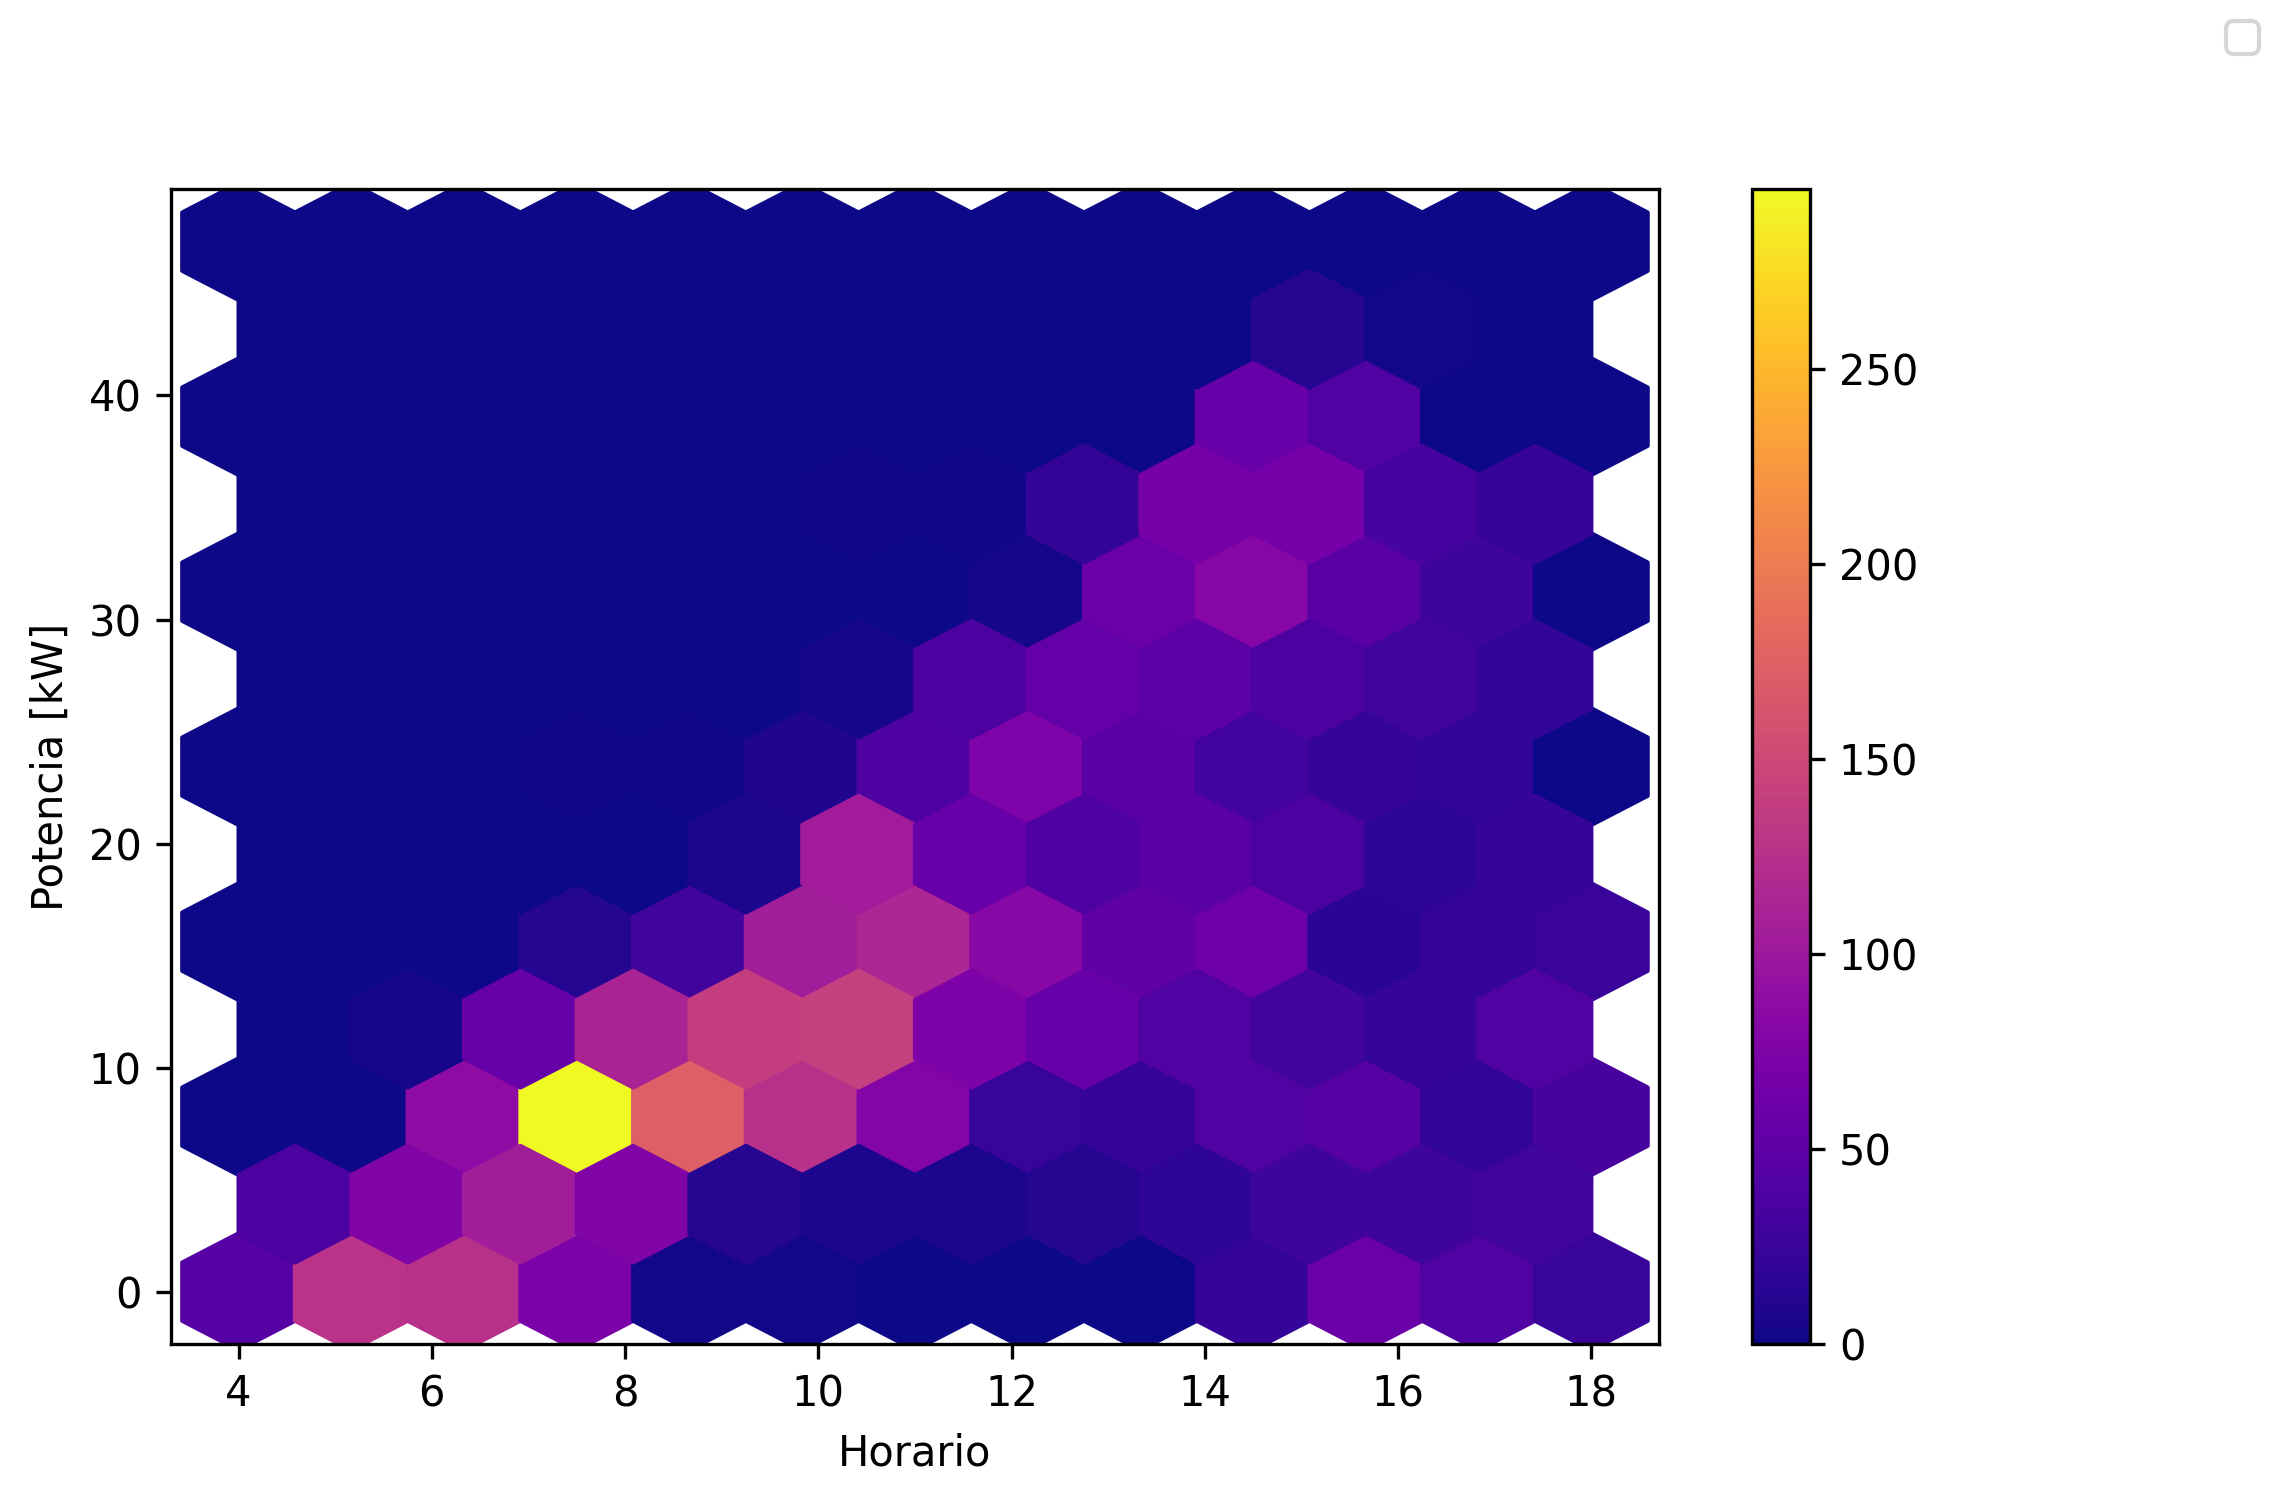

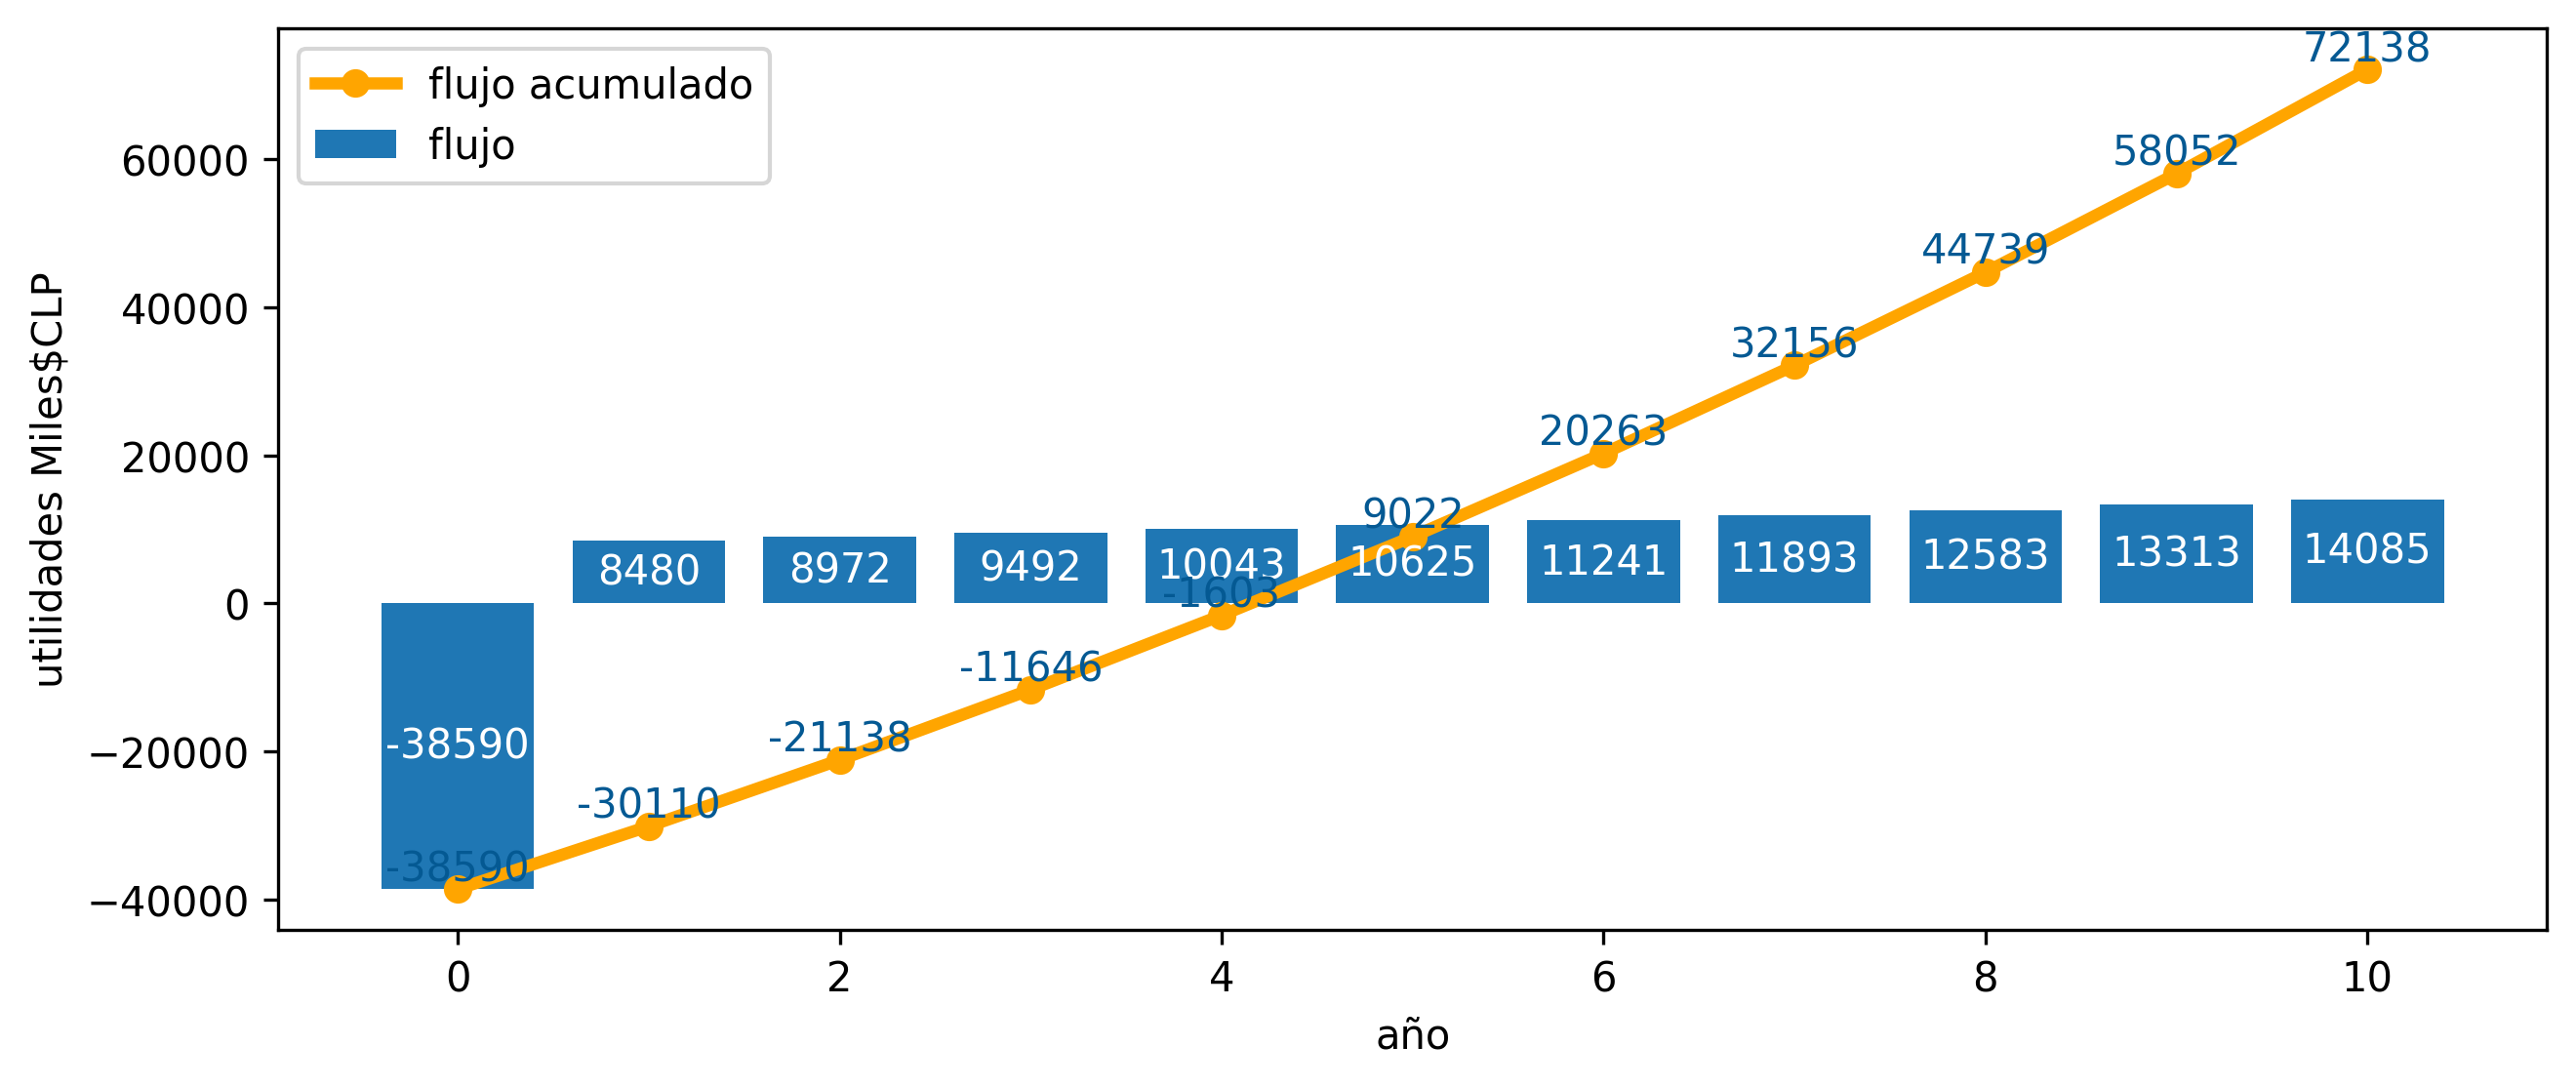

In [5]:
from models.plotter import generate_docs
generate_docs(project)